##############缺失值处理Python实现步骤########################

In [37]:
import pandas as pd  #导入pandas，为数据处理的一个库

In [38]:
inputfile="C:\D\software\Python\Study\数据挖掘\Python数据分析与挖掘实战\chapter4\demo\data\catering_sale.xls" #设置数据路径

In [39]:
data=pd.read_excel(inputfile,index_col=u'日期')#读取Excel文件中的数据，并设置索引列

In [78]:
data.describe()#对数据进行基本的统计描述，非空值的数量、均值、标准差、最大最小值等信息

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


In [19]:
data[data.isnull().values==True]#分析缺失值和提取缺失值的数据列表

,日期,销量
14,2015-02-14,NaN


In [41]:
new_data=data.interpolate()#使用插值法对缺失值进行填充

In [42]:
import matplotlib.pyplot as plt #导入绘图库

In [43]:
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [74]:
p=new_data.boxplot(return_type='dict')#建立箱线图

In [75]:
y=p['fliers'][0].get_ydata()
x=p['fliers'][0].get_xdata()

In [76]:
y.sort()

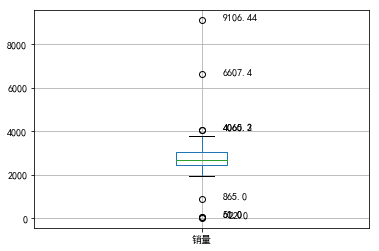

In [77]:
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.1-0.8/(y[:1]),y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.08,y[i]))
plt.show()

In [79]:
print(p)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000000000E6DA940>, <matplotlib.lines.Line2D object at 0x000000000E6DAB38>], 'caps': [<matplotlib.lines.Line2D object at 0x000000000E6E19B0>, <matplotlib.lines.Line2D object at 0x000000000E6E1B70>], 'boxes': [<matplotlib.lines.Line2D object at 0x000000000E6D0F98>], 'medians': [<matplotlib.lines.Line2D object at 0x000000000E6E83C8>], 'fliers': [<matplotlib.lines.Line2D object at 0x000000000E6E8BE0>], 'means': []}


In [87]:
p['caps'][0].get_ydata()

array([ 1958.,  1958.])

In [88]:
p['boxes'][0].get_ydata()

array([ 2452.6,  2452.6,  3023.8,  3023.8,  2452.6])

In [89]:
p['whiskers'][0].get_ydata()

array([ 2452.6,  1958. ])

In [90]:
p['medians'][0].get_ydata()

array([ 2655.9,  2655.9])

In [100]:
from scipy.stats import kstest#导入正态分布检验函数

In [102]:
kstest(new_data[u'销量'],'norm')
#对数据正态性进行分析，看P值，如果|p|<0.003,则认为处于φ-3σ到φ+3σ之外的数值为异常值，φ为均值，σ为标准差

KstestResult(statistic=1.0, pvalue=0.0)

In [113]:
Max=data[u'销量'].mean()+(data[u'销量'].std())*3 #计算去除异常值的上限值

In [114]:
Min=data[u'销量'].mean()-(data[u'销量'].std())*3#计算去除异常值的下限值

In [116]:
result=data[(data[u'销量']>Min)&(data[u'销量']<Max)] #去除异常值的数据